<a href="https://colab.research.google.com/github/Mbigdeli2003/Fault-Detection/blob/main/SVM_10Clasess_TEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM on10 ClasessTEP

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools
import pickle
import scipy.io
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Importing TEP

In [3]:
##Train
Fault_Free_Train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Normal 00 train (480x52).xlsx") #replace address from drive
Faulty_Train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx") #replace address from drive

##Test

Fault_Free_Test = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Normal 00 test (960x52).xlsx") #replace address from drive
Faulty_Test = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  test  (20x960x52).xlsx") #replace address from drive

## Sorting Data
Names = ['Unnamed: 0', 'faultNumber', 'simulationRun', 'sample', 'xmeas_1',
       'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7',
       'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13',
       'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19',
       'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25',
       'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31',
       'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37',
       'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2',
       'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10',
       'xmv_11']
Faulty_Train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx", header=None, names=Names)

###consdering same sample for all calsses

In [4]:
X1=Faulty_Train[(Faulty_Train.faultNumber==1)].iloc[0:480,:]
X3=Faulty_Train[(Faulty_Train.faultNumber==3)].iloc[0:480,:]

X5=Faulty_Train[(Faulty_Train.faultNumber==5)].iloc[0:480,:]

X7=Faulty_Train[(Faulty_Train.faultNumber==7)].iloc[0:480,:]

X9=Faulty_Train[(Faulty_Train.faultNumber==9)].iloc[0:480,:]

X11=Faulty_Train[(Faulty_Train.faultNumber==11)].iloc[0:480,:]

X13=Faulty_Train[(Faulty_Train.faultNumber==13)].iloc[0:480,:]

X15=Faulty_Train[(Faulty_Train.faultNumber==15)].iloc[0:480,:]
X17=Faulty_Train[(Faulty_Train.faultNumber==17)].iloc[0:480,:]
Faulty_Train_T=pd.concat([X1,X3,X5,X7,X9,X11,X13,X15,X17])
type(Faulty_Train_T)
type(Fault_Free_Train)

Faulty_Test_1= Faulty_Test[(Faulty_Test.faultNumber==1)|
                                 (Faulty_Test.faultNumber==3 )|
                                 (Faulty_Test.faultNumber==5 )|
                                 (Faulty_Test.faultNumber==7 )|
                                 (Faulty_Test.faultNumber==9 )|
                                 (Faulty_Test.faultNumber==11 )|
                                 (Faulty_Test.faultNumber==13)|
                                 (Faulty_Test.faultNumber==15 )|
                                 (Faulty_Test.faultNumber==17)]

### **Concating Data for Train and Test**

In [5]:
Fault_Free_Train_1=(Fault_Free_Train).iloc[:,4:]
Faulty_Train_T_1=(Faulty_Train_T).iloc[:,4:]
Fault_Free_Test_1=(Fault_Free_Test).iloc[:,4:]
Faulty_Test_2=(Faulty_Test_1).iloc[:,4:]
Data_Train=pd.concat([Fault_Free_Train_1,Faulty_Train_T_1])
Data_Test=pd.concat([Fault_Free_Test_1,Faulty_Test_2])
Data = pd.concat([Fault_Free_Train_1,Faulty_Train_T_1,Fault_Free_Test_1,Faulty_Test_2])
Label_Train_K_1=(Fault_Free_Train).iloc[:,1]
Label_Train_K_2=(Faulty_Train_T).iloc[:,1]
Label_Test_K_1=(Fault_Free_Test).iloc[:,1]
Label_Test_K_2=(Faulty_Test_1).iloc[:,1]
Label_Train=pd.concat([Label_Train_K_1,Label_Train_K_2]).values
Label_Test=pd.concat([Label_Test_K_1,Label_Test_K_2]).values

## Applying SVM on 10 classes withought preprcessing

In [53]:
#classifier_SVM = SVC(kernel = 'rbf', random_state = 0,verbose=1)
#classifier_kSVM_sigmoid = SVC(kernel = 'sigmoid', random_state = 0)
#classifier_kSVM_poly = SVC(kernel = 'poly',  random_state = 0)
classifier_kSVM = SVC(kernel = 'poly', C  = 1000, class_weight= 'balanced',gamma='scale', random_state = 0)

In [54]:
classifier_kSVM.fit(Data_Train, Label_Train)
# ..... (Almost Similar For Kernels)
# ..... (Almost Similar For Kernels)
# ..... (Almost Similar For Kernels)


SVC(C=1000, class_weight='balanced', kernel='poly', random_state=0)

In [55]:
y_pred_SVM = classifier_kSVM.predict(Data_Test)
# ..... (Almost Similar For Kernels)
# ..... (Almost Similar For Kernels)
# ..... (Almost Similar For Kernels)

### Visualizing SVM

In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [57]:
cm_SVM = confusion_matrix(Label_Test, y_pred_SVM )

### Confusion Matrix

Confusion matrix, without normalization


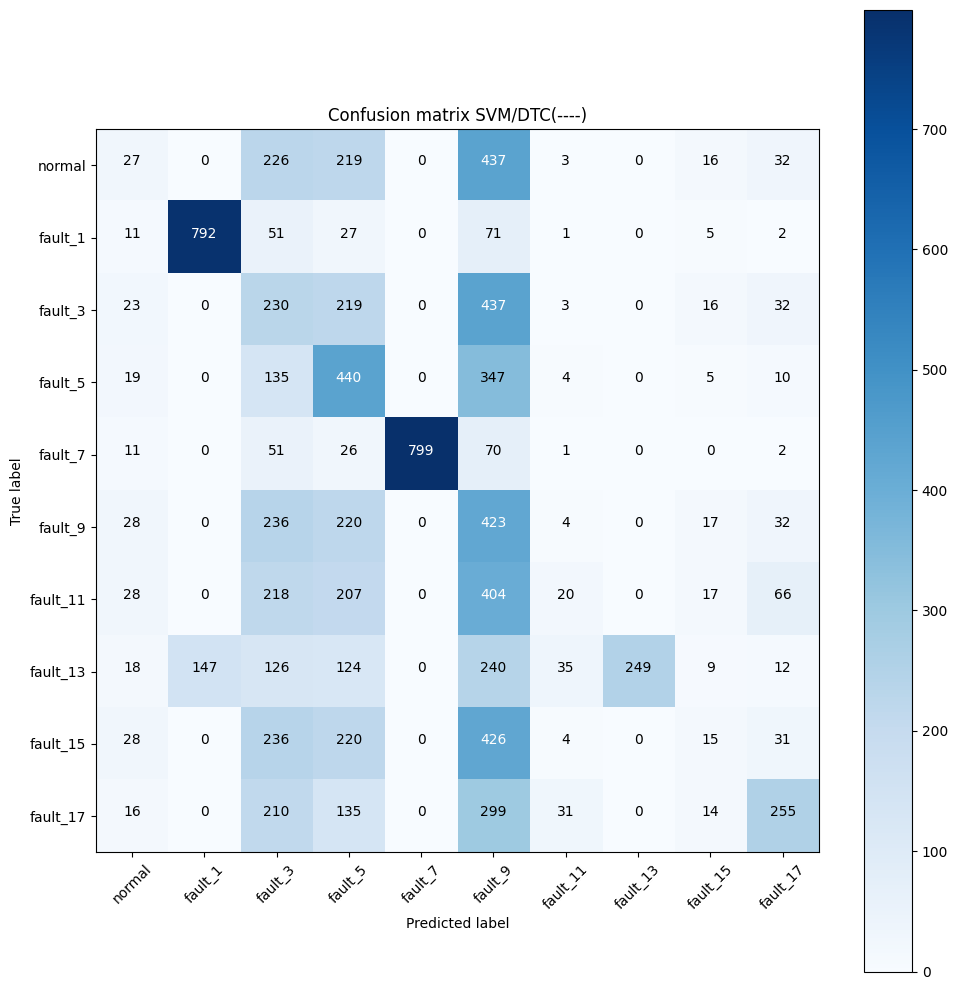

In [58]:
f = plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_SVM, ['normal','fault_1', 'fault_3', 'fault_5', 'fault_7', 'fault_9', 'fault_11',
       'fault_13', 'fault_15', 'fault_17'],
                          normalize=False,
                          title='Confusion matrix SVM/DTC(----)',   # Change this tittle
                          cmap=plt.cm.Blues)

### Accuracy for SVM

In [59]:
from sklearn.metrics import classification_report
Target_Names=['normal','fault_1', 'fault_3', 'fault_5', 'fault_7', 'fault_9', 'fault_11','fault_13', 'fault_15', 'fault_17']
print(classification_report(Label_Test,y_pred_SVM ,target_names=Target_Names))

              precision    recall  f1-score   support

      normal       0.13      0.03      0.05       960
     fault_1       0.84      0.82      0.83       960
     fault_3       0.13      0.24      0.17       960
     fault_5       0.24      0.46      0.31       960
     fault_7       1.00      0.83      0.91       960
     fault_9       0.13      0.44      0.21       960
    fault_11       0.19      0.02      0.04       960
    fault_13       1.00      0.26      0.41       960
    fault_15       0.13      0.02      0.03       960
    fault_17       0.54      0.27      0.36       960

    accuracy                           0.34      9600
   macro avg       0.43      0.34      0.33      9600
weighted avg       0.43      0.34      0.33      9600

